In [1]:
%matplotlib inline
import pandas as pd
import glob
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import shapefile
import matplotlib as mpl

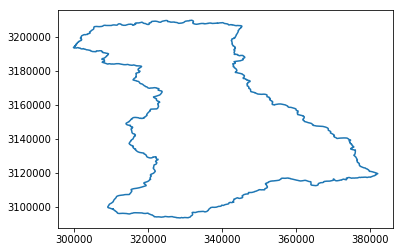

In [171]:
#read shapefile
shpFilePath = '/home/bikas/Downloads/rakesh/watershed.shp'  
listx=[]
listy=[]
test = shapefile.Reader(shpFilePath)
for sr in test.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew)
        listy.append(yNew)
        
poly = mpl.path.Path(list(zip(listx,listy)))
plt.plot(listx,listy)
plt.show()

### Data read and plot for single point

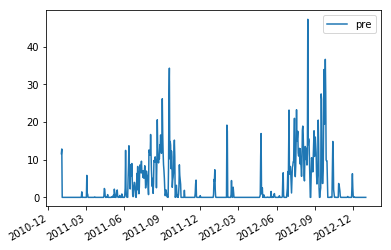

In [169]:
ncfile = glob.glob('*.nc')
date = []
prec = []
for i in np.arange(len(ncfile)):
    ds1 = xr.open_dataset(ncfile[i])
    for j in np.arange(len(ds1.variables['time'])):
        dates = pd.to_datetime((ds1['time'][j].values))
        preci = np.ravel(ds1.variables['P'][j,150,150])
        date = np.append(date,dates)
        prec = np.append(prec,preci)
        data = pd.DataFrame({'pre':prec},index = date)
data.plot()

### data extract for one day over basin

In [172]:
for i in np.arange(len(ncfile)):
    ds1 = xr.open_dataset(ncfile[i])
    lat = ds1.variables['latitude'][:]
    lon = ds1.variables['longitude'][:]
    prec = ds1.variables['P'][0,:,:] # here 0 is for first day in nc file
    date = ds1['time']
    Lat,Lon = np.meshgrid(lat,lon)
    lats = np.ravel(Lat)
    lons = np.ravel(Lon)
    preci = np.ravel(prec)
    mask = poly.contains_points(list(zip(lons,lats)))
    pre_ma = preci [mask]
    lat_ma = lats [mask]
    lon_ma = lons [mask]
    
    oneday_frame = pd.DataFrame({'lon': lon_ma,'lat': lat_ma,'pre':pre_ma})


### Data extract for entire period over basin

In [175]:
daily_values = []
ds = xr.open_dataset(ncfile[0])
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]  
Lat,Lon = np.meshgrid(lat,lon)
lats = np.ravel(Lat)
lons = np.ravel(Lon)
mask = poly.contains_points(list(zip(lons,lats)))
lat_ma = lats [mask]
lon_ma = lons [mask]
frame = pd.DataFrame({'lon': lon_ma,'lat': lat_ma})

for i in np.arange(len(ncfile)):
    frame = frame
    for j in np.arange(len(ds.variables['time'])): 
        ds1 = xr.open_dataset(ncfile[i])
        prec = np.ravel(ds.variables['P'][j,:,:])
        pre_ma = prec [mask]       
        dates = pd.to_datetime((ds1['time'][j].values))
        frame[dates] = pre_ma
    ds = xr.open_dataset(ncfile[i])

### Timeseries plot for grid 2

In [176]:
## location is 
frame.loc[1][:2]

lat    3205000.0
lon     315000.0
Name: 1, dtype: float64

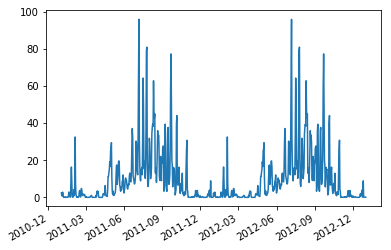

In [177]:
# Timeseries plot
frame.loc[1][2:].plot()

### Plot over Trisuli basin for arbitary day 3

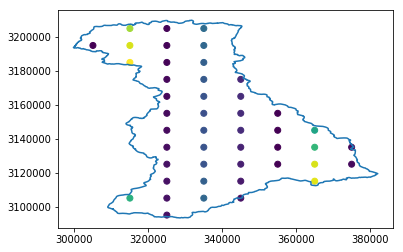

In [178]:
plt.scatter(frame['lon'],frame['lat'],c = frame[frame.columns[3]])
plt.plot(listx,listy)

### Export data in .csv format

In [180]:
frame.to_csv('all_data.csv',index = False)

### To read again

In [182]:
data = pd.read_table('all_data.csv',sep = ',')
data

,lat,lon,2012-01-01 12:00:00,2012-01-02 12:00:00,2012-01-03 12:00:00,2012-01-04 12:00:00,2012-01-05 12:00:00,2012-01-06 12:00:00,2012-01-07 12:00:00,2012-01-08 12:00:00,...,2011-12-22 12:00:00,2011-12-23 12:00:00,2011-12-24 12:00:00,2011-12-25 12:00:00,2011-12-26 12:00:00,2011-12-27 12:00:00,2011-12-28 12:00:00,2011-12-29 12:00:00,2011-12-30 12:00:00,2011-12-31 12:00:00
0,3195000.0,305000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3205000.0,315000.0,2.40,0.99,0.77,2.81,1.32,0.12,0.00,0.00,...,3.87,0.15,0.60,8.90,0.19,0.04,0.04,0.05,0.07,0.08
2,3195000.0,315000.0,2.48,1.08,0.85,2.80,1.42,0.13,0.00,0.00,...,4.49,0.17,0.64,10.89,0.23,0.05,0.04,0.05,0.07,0.08
3,3185000.0,315000.0,2.46,1.15,0.87,2.80,1.55,0.13,0.00,0.00,...,4.88,0.20,0.69,12.03,0.27,0.06,0.03,0.05,0.07,0.08
4,3105000.0,315000.0,1.37,0.73,0.36,1.56,0.99,0.07,0.00,0.00,...,4.61,0.17,0.30,9.29,0.29,0.05,0.02,0.02,0.03,0.03
5,3205000.0,325000.0,0.05,0.01,0.37,0.54,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,3195000.0,325000.0,0.05,0.01,0.41,0.59,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,3185000.0,325000.0,0.04,0.01,0.41,0.57,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,3175000.0,325000.0,0.05,0.02,0.44,0.60,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,3165000.0,325000.0,0.05,0.02,0.45,0.66,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
